The Cross-Industry Standard Process for Data Mining -CRIPS DM approach is used for this project. Data on 2000 bank loan clients is provided. This data includes information such as the customer's name, age, gender, the number of years they've lived at a specific residence, and job status. nation, previous debt, postcode, income, homeowners, CCJs, and how much the bank loaned them, as well as whether the loan was paid This information already shows which consumers haven't paid back their loans and which have. 

Supervised Models Used in Project:
Logistic regression,
Decision tree,
Random forest model


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline


loan_data = pd.read_csv(r'C:\Users\Naaninge\Downloads\Filtered.csv')

### Analysing Data

<AxesSubplot:xlabel='Outcome', ylabel='count'>

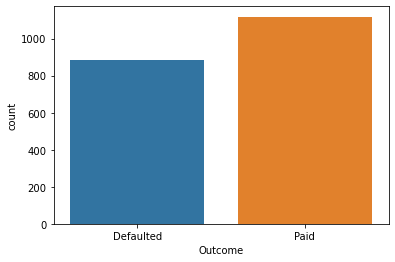

In [47]:
sns.countplot(x="Outcome", data=loan_data)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

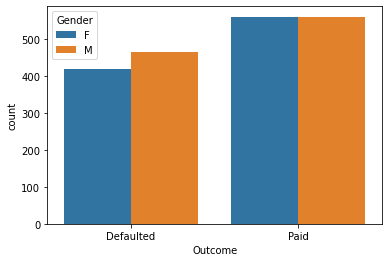

In [48]:
sns.countplot(x="Outcome", hue="Gender", data=loan_data)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

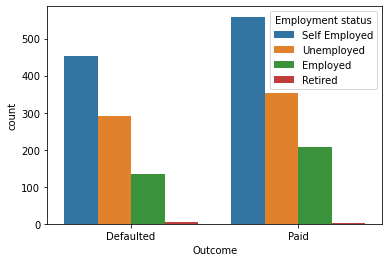

In [49]:
sns.countplot(x="Outcome",hue="Employment status", data=loan_data)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

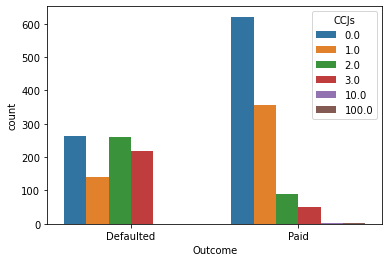

In [50]:
sns.countplot(x="Outcome",hue="CCJs", data=loan_data)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

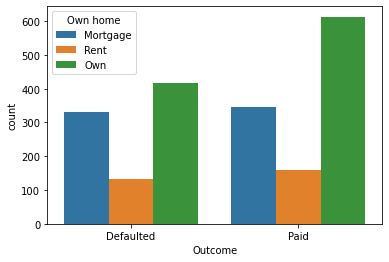

In [51]:
sns.countplot(x="Outcome",hue="Own home", data=loan_data)

<AxesSubplot:ylabel='Frequency'>

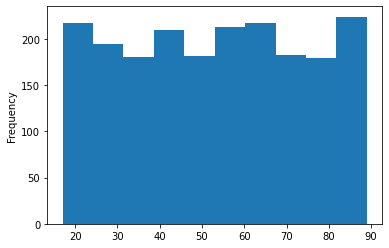

In [52]:
loan_data['Age'].plot.hist()

<AxesSubplot:xlabel='Employment status', ylabel='count'>

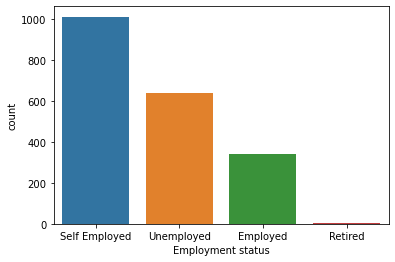

In [53]:
sns.countplot(x="Employment status", data=loan_data)

In [54]:
loan_data = loan_data.dropna(axis=0)

In [55]:
loan_data.head()

,Age,Gender,Years at address,Employment status,Country,Current debt,Postcode,Income,Own home,CCJs,Loan amount,Outcome
0,39.0,F,18,Self Employed,UK,4790,ME13 0BL,51500,Mortgage,3.0,1640,Defaulted
1,58.0,F,20,Self Employed,UK,1270,FY8 5LW,24000,Rent,2.0,5164,Defaulted
2,19.0,F,2,Unemployed,UK,0,TA3 7SH,45500,Rent,1.0,13234,Paid
3,66.0,F,13,Unemployed,UK,1080,WV6 8SU,18000,Own,0.0,5561,Paid
4,48.0,F,4,Self Employed,UK,3690,BT15 5HG,47500,Rent,1.0,28288,Paid


In [56]:
loan_data.drop('Country', axis=1, inplace=True)

In [57]:
loan_data.head()

,Age,Gender,Years at address,Employment status,Current debt,Postcode,Income,Own home,CCJs,Loan amount,Outcome
0,39.0,F,18,Self Employed,4790,ME13 0BL,51500,Mortgage,3.0,1640,Defaulted
1,58.0,F,20,Self Employed,1270,FY8 5LW,24000,Rent,2.0,5164,Defaulted
2,19.0,F,2,Unemployed,0,TA3 7SH,45500,Rent,1.0,13234,Paid
3,66.0,F,13,Unemployed,1080,WV6 8SU,18000,Own,0.0,5561,Paid
4,48.0,F,4,Self Employed,3690,BT15 5HG,47500,Rent,1.0,28288,Paid


<AxesSubplot:>

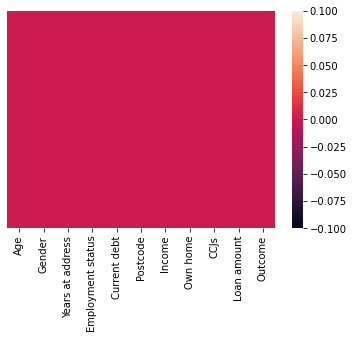

In [58]:
sns.heatmap(loan_data.isnull(), yticklabels=False)

In [59]:
loan_data.isnull().sum()

Age                  0
Gender               0
Years at address     0
Employment status    0
Current debt         0
Postcode             0
Income               0
Own home             0
CCJs                 0
Loan amount          0
Outcome              0
dtype: int64

In [60]:
gender = pd.get_dummies(loan_data['Gender'], drop_first=True)
gender.head(5)

,M
0,0
1,0
2,0
3,0
4,0


In [61]:
outcome = pd.get_dummies(loan_data['Outcome'], drop_first=True)
outcome.head(5)

,Paid
0,0
1,0
2,1
3,1
4,1


In [62]:
employment = pd.get_dummies(loan_data['Employment status'], drop_first=True)
employment.head(5)

,Retired,Self Employed,Unemployed
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [63]:
own_home = pd.get_dummies(loan_data['Own home'])
own_home.head(5)

,Mortgage,Own,Rent
0,1,0,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1


In [64]:
loan_data = pd.concat([loan_data,gender,employment,outcome,own_home], axis=1)

In [65]:
loan_data.head(5)

,Age,Gender,Years at address,Employment status,Current debt,Postcode,Income,Own home,CCJs,Loan amount,Outcome,M,Retired,Self Employed,Unemployed,Paid,Mortgage,Own,Rent
0,39.0,F,18,Self Employed,4790,ME13 0BL,51500,Mortgage,3.0,1640,Defaulted,0,0,1,0,0,1,0,0
1,58.0,F,20,Self Employed,1270,FY8 5LW,24000,Rent,2.0,5164,Defaulted,0,0,1,0,0,0,0,1
2,19.0,F,2,Unemployed,0,TA3 7SH,45500,Rent,1.0,13234,Paid,0,0,0,1,1,0,0,1
3,66.0,F,13,Unemployed,1080,WV6 8SU,18000,Own,0.0,5561,Paid,0,0,0,1,1,0,1,0
4,48.0,F,4,Self Employed,3690,BT15 5HG,47500,Rent,1.0,28288,Paid,0,0,1,0,1,0,0,1


In [66]:
loan_data.drop(['Gender', 'Employment status', 'Postcode','Own home','Outcome'], axis=1, inplace=True)

In [67]:
loan_data.head()

,Age,Years at address,Current debt,Income,CCJs,Loan amount,M,Retired,Self Employed,Unemployed,Paid,Mortgage,Own,Rent
0,39.0,18,4790,51500,3.0,1640,0,0,1,0,0,1,0,0
1,58.0,20,1270,24000,2.0,5164,0,0,1,0,0,0,0,1
2,19.0,2,0,45500,1.0,13234,0,0,0,1,1,0,0,1
3,66.0,13,1080,18000,0.0,5561,0,0,0,1,1,0,1,0
4,48.0,4,3690,47500,1.0,28288,0,0,1,0,1,0,0,1


### test training data

In [68]:
X=loan_data.drop('Paid',axis=1)
y=loan_data['Paid']

In [69]:
from sklearn.model_selection import train_test_split


In [70]:
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.30, random_state=42)

### Logistic Regression Model

In [71]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)




LogisticRegression()

### Decision Tree Model

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)



DecisionTreeClassifier()

### Random Forest Model

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
lg_predictions = log_model.predict(X_test)

In [75]:
dt_predictions = dt_model.predict(X_test)

In [76]:
rf_predictions = rf_model.predict(X_test)

### Predictions

In [77]:
from sklearn.metrics import classification_report

In [78]:
print('logistic regression')
print(classification_report(y_test, lg_predictions))

logistic regression
              precision    recall  f1-score   support

           0       0.68      0.57      0.62       268
           1       0.69      0.78      0.73       332

    accuracy                           0.69       600
   macro avg       0.68      0.68      0.68       600
weighted avg       0.69      0.69      0.68       600



In [79]:
print('decsion tree ')
print(classification_report(y_test, dt_predictions))

decsion tree 
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       268
           1       0.70      0.70      0.70       332

    accuracy                           0.67       600
   macro avg       0.66      0.66      0.66       600
weighted avg       0.67      0.67      0.67       600



In [80]:
print('random forest')
print(classification_report(y_test, rf_predictions))

random forest
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       268
           1       0.76      0.83      0.79       332

    accuracy                           0.76       600
   macro avg       0.76      0.75      0.75       600
weighted avg       0.76      0.76      0.75       600



### Confusion Matrix

In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
print('logistic regression confusion matrix')
confusion_matrix(y_test, lg_predictions)

logistic regression confusion matrix


array([[153, 115],
       [ 73, 259]], dtype=int64)

In [83]:
print('decision tree confusion matrix')
confusion_matrix(y_test, dt_predictions)

decision tree confusion matrix


array([[168, 100],
       [100, 232]], dtype=int64)

In [84]:
print('random forest confusion matrix')
confusion_matrix(y_test, rf_predictions)

random forest confusion matrix


array([[180,  88],
       [ 58, 274]], dtype=int64)

In [85]:
from sklearn.metrics import accuracy_score
print(f'logistic regression accuracy: {accuracy_score(y_test, lg_predictions)}')
print(f'decision tree accuracy:       {accuracy_score(y_test, dt_predictions)}')
print(f'random forest accuracy:       {accuracy_score(y_test, rf_predictions)}')




logistic regression accuracy: 0.6866666666666666
decision tree accuracy:       0.6666666666666666
random forest accuracy:       0.7566666666666667


### Hyperparameters

In [99]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

model_params = {
      'decision tree': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy'],
            'max_depth' : [2,4,6,8,10,12],
            'splitter':  ['best', 'random']
            
        }
      },
   
    'random forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10, 100, 1000]
            
        }
    },
    'logistic regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [100, 10, 1.0, 0.1, 0.01]
        }
    }
}

In [100]:

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,decision tree,0.775774,"{'criterion': 'entropy', 'max_depth': 6, 'spli..."
1,random forest,0.779771,{'n_estimators': 1000}
2,logistic regression,0.691177,{'C': 0.01}


In [95]:
model_params = {
      'decision tree': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy'],
            'max_depth' : [2,4,6,8,10,12],
           
        }
      },
   
    'random forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [96]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,decision tree,0.775774,"{'criterion': 'entropy', 'max_depth': 6}"
1,random forest,0.733217,{'n_estimators': 10}
2,logistic regression,0.684648,{'C': 5}


### ROC AUC 

C:\Users\Naaninge\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Naaninge\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Naaninge\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_est

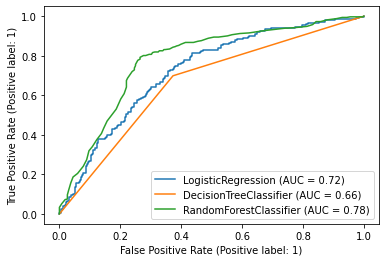

In [92]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(log_model, X_test, y_test)
plot_roc_curve(dt_model, X_test, y_test, ax=disp.ax_);
plot_roc_curve(rf_model, X_test, y_test, ax=disp.ax_);